# The Big Five personality traits are:

Openness :
People who like to learn new things and enjoy new experiences usually score high in openness. Openness includes traits like being insightful and imaginative and having a wide variety of interests.

Conscientiousness :
People that have a high degree of conscientiousness are reliable and prompt. Traits include being organized, methodic, and thorough.

Extraversion :
Extraverts get their energy from interacting with others, while introverts get their energy from within themselves. Extraversion includes the traits of energetic, talkative, and assertive.

Agreeableness :
These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant. Traits include being kind, affectionate, and sympathetic.

Neuroticism :
Neuroticism is also sometimes called Emotional Stability. This dimension relates to one’s emotional stability and degree of negative emotions. People that score high on neuroticism often experience emotional instability and negative emotions. Traits include being moody and tense.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data-final.csv', sep='\t')

In [7]:
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [8]:
## Drop unwanted data.

df.drop(['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], axis = 1, inplace = True)

In [9]:
## After Droping Columns.
df.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0


In [10]:
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),1783,1783,1783,1783,1783,1783,1783,1783,1783,1783,...,1783,1783,1783,1783,1783,1783,1783,1783,1783,1783
null values (%),0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,...,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606,0.175606


In [11]:
df.shape

(1015341, 100)

In [12]:
#Check Missing Value
print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  True
How many missing values?  178300
Number of participants after eliminating missing values:  1013558


# Analyzing data for category Extraversion.

### Questions:

EXT1 : I am the life of the party

EXT2 : I dont talk a lot

EXT3 : I feel comfortable around people

EXT4 : I keep in the background

EXT5 : I start conversations

EXT6 : I have little to say

EXT7 : I talk to a lot of different people at parties

EXT8 : I dont like to draw attention to myself

EXT9 : I dont mind being the center of attention

EXT10: I am quiet around strangers

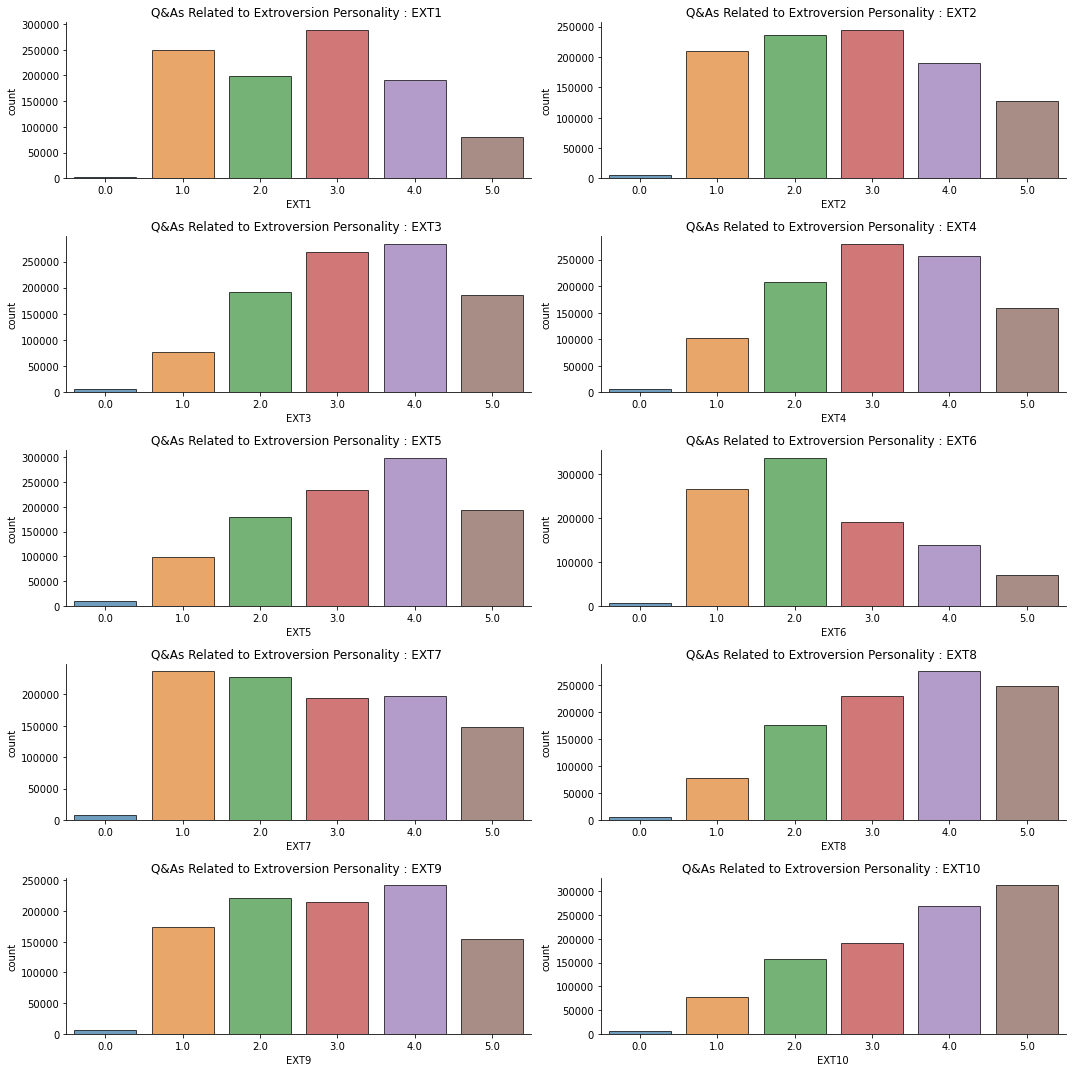

In [10]:
#barplots showing the frequency of each category
plt.figure(figsize=[15,15])
fft=['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Extroversion Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# 2.2. Q&As Related to Neuroticism Personality
EST1 : I get stressed out easily

EST2 : I am relaxed most of the time

EST3 : I worry about things

EST4 : I seldom feel blue

EST5 : I am easily disturbed

EST6 : I get upset easily

EST7 : I change my mood a lot

EST8 : I have frequent mood swings

EST9 : I get irritated easily

EST10: I often feel blue

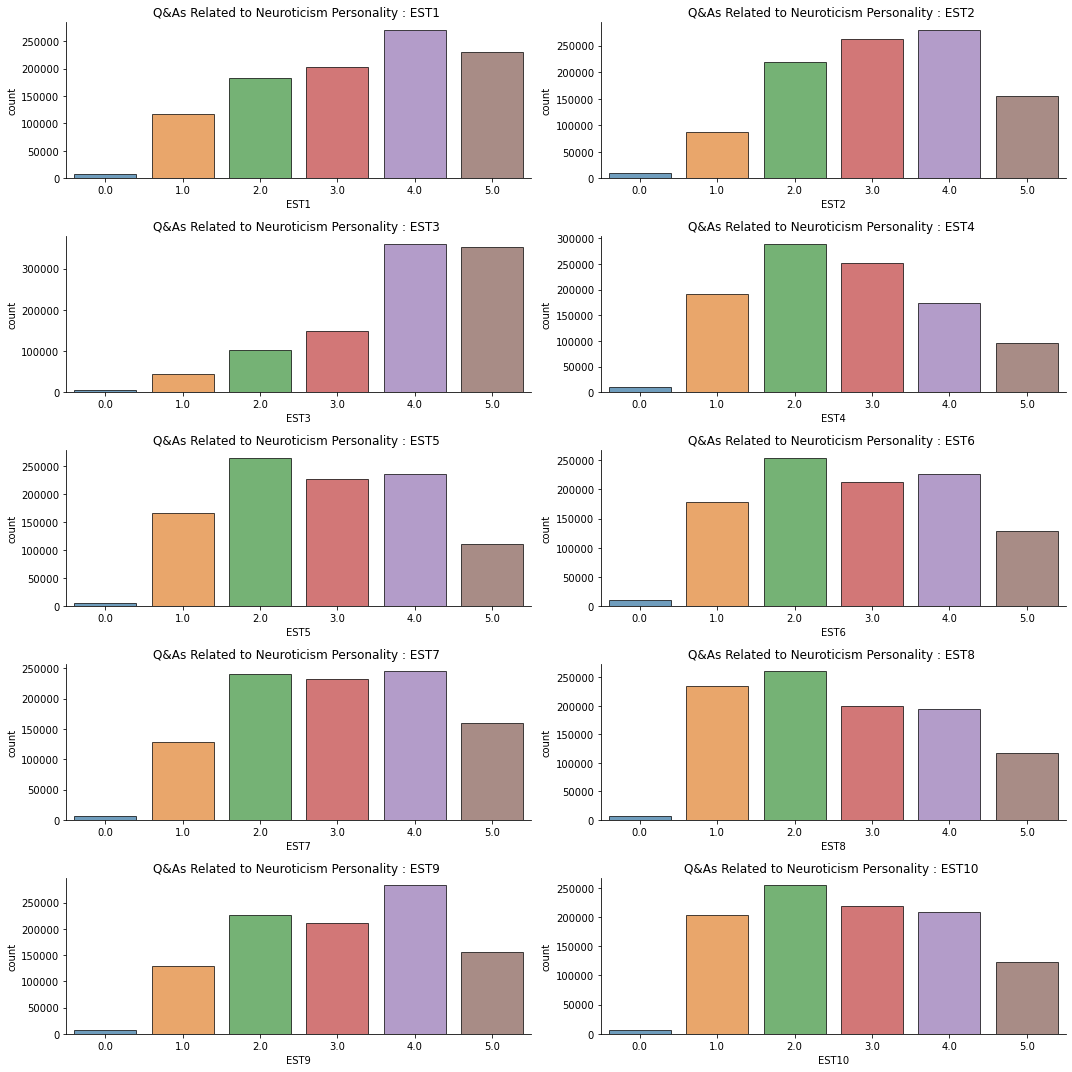

In [11]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Neuroticism Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# 2.3. Q&As Related to Agreeable Personality
AGR1 : I feel little concern for others

AGR2 : I am interested in people,

AGR3 : I insult people,

AGR4 : I sympathize with others feelings,

AGR5 : I am not interested in other peoples problems,

AGR6 : I have a soft heart

AGR7 : I am not really interested in others

AGR8 : I take time out for others

AGR9 : I feel others emotions

AGR10: I make people feel at ease

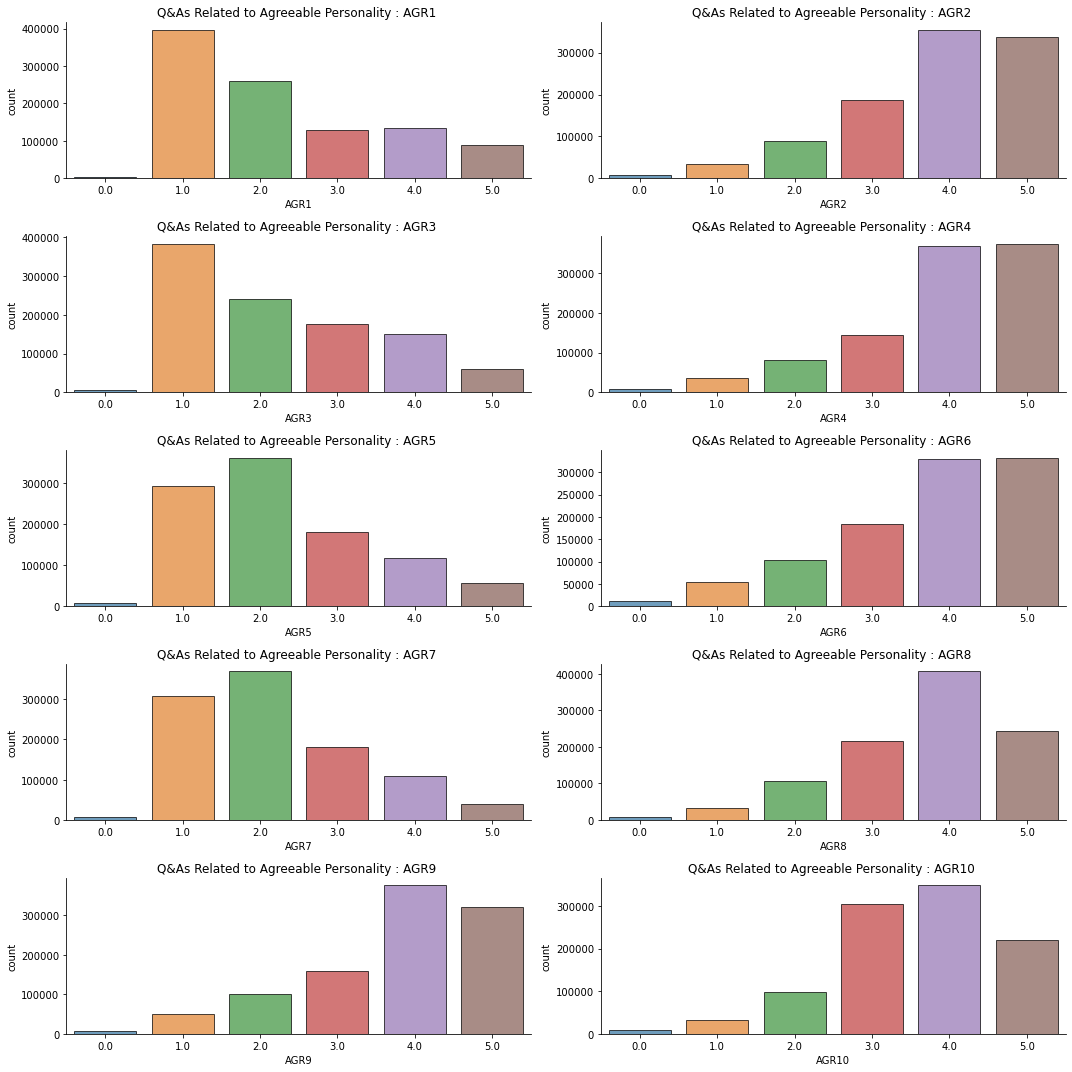

In [12]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# 2.4. Q&As Related to Conscientious Personality
CSN1 : I am always prepared


CSN2 : I leave my belongings around

CSN3 : I pay attention to details

CSN4 : I make a mess of things

CSN5 : I get chores done right away

CSN6 : I often forget to put things back in their proper place

CSN7 : I like order

CSN8 : I shirk my duties

CSN9 : I follow a schedule

CSN10 : I am exacting in my work

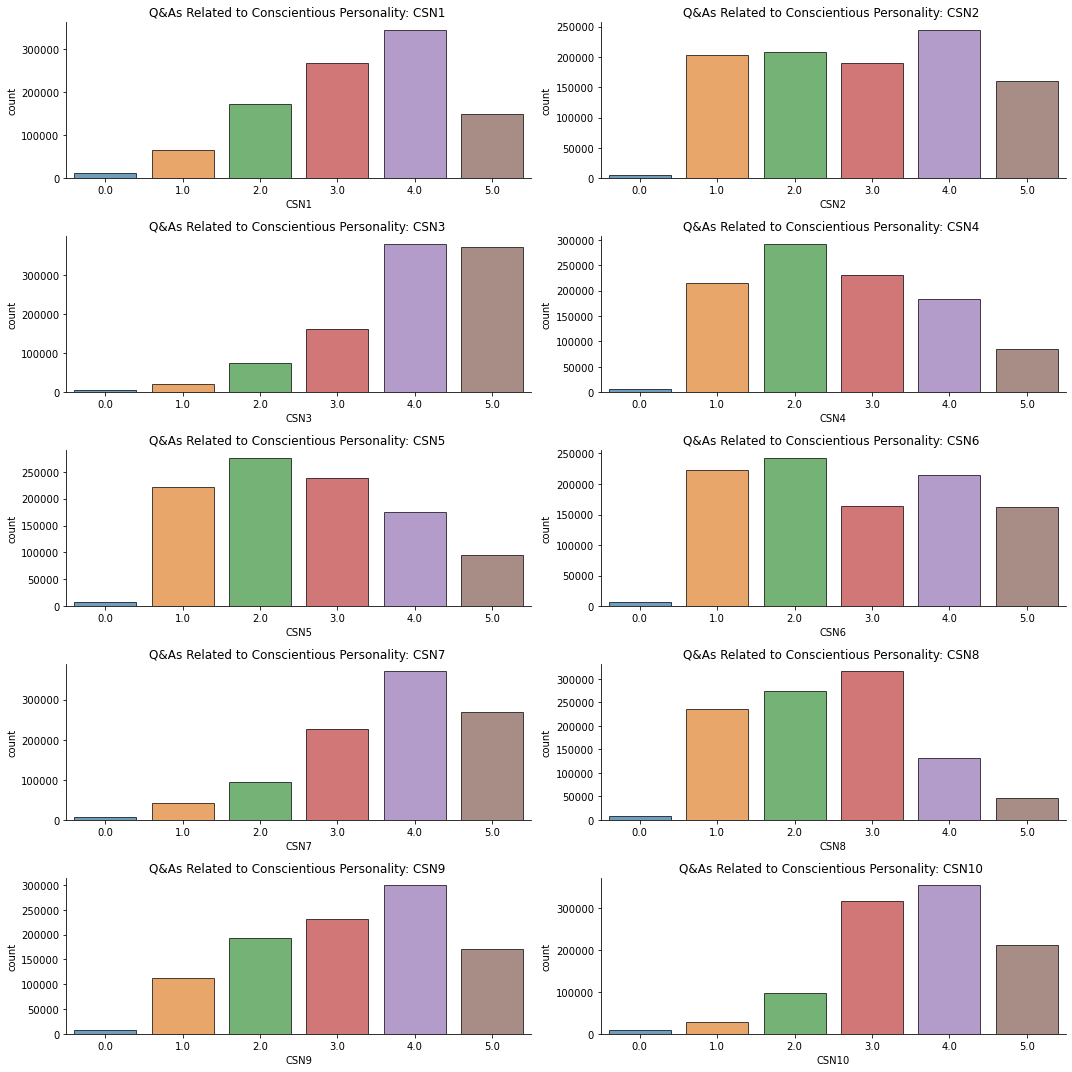

In [13]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Conscientious Personality: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

# 2.5. Q&As Related to Open Personality
OPN1 : I have a rich vocabulary

OPN2 : I have difficulty understanding abstract ideas

OPN3 : I have a vivid imagination

OPN4 : I am not interested in abstract ideas

OPN5 : I have excellent ideas

OPN6 : I do not have a good imagination

OPN7 : I am quick to understand things

OPN8 : I use difficult words

OPN9 : I spend time reflecting on things

OPN10: I am full of ideas

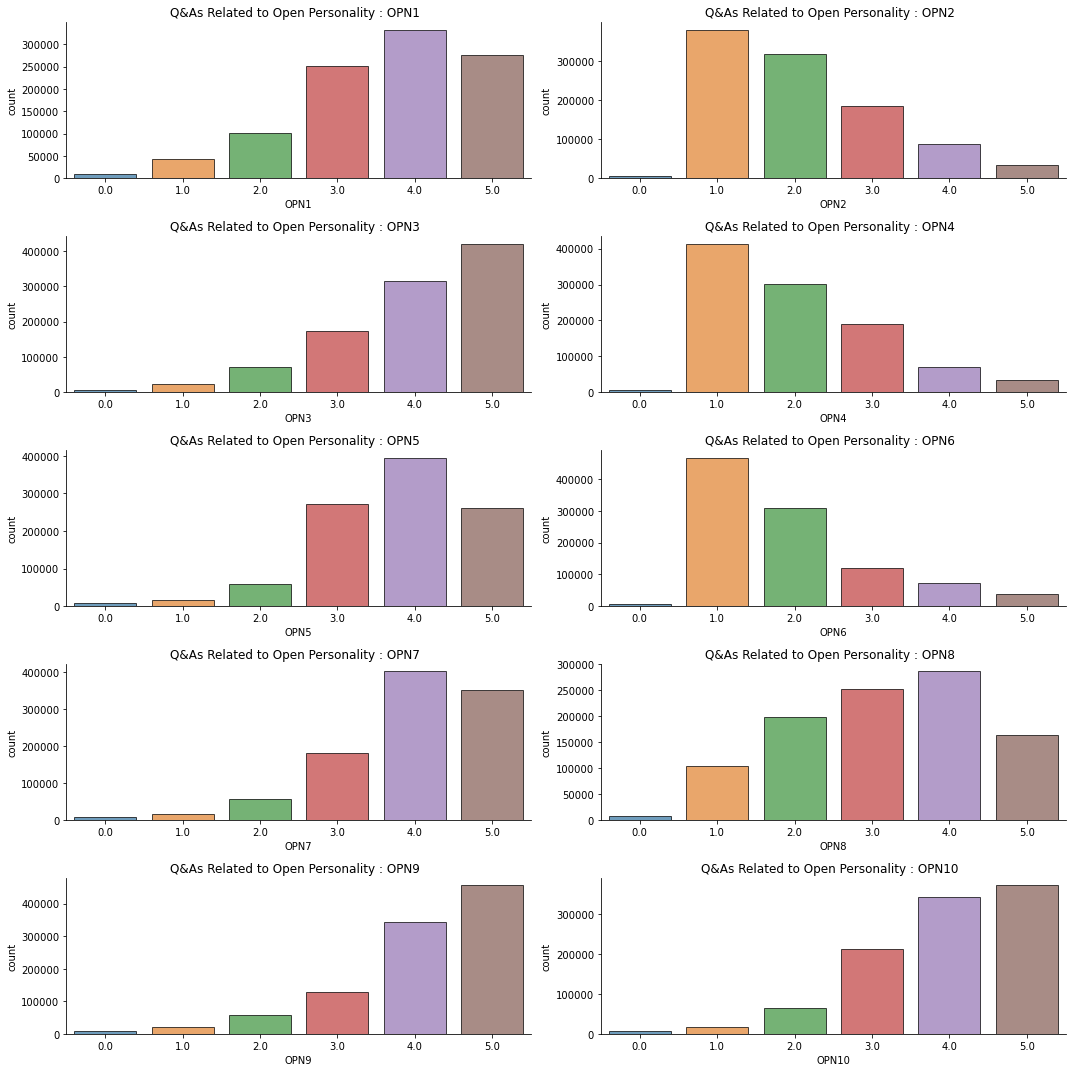

In [14]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Q&As Related to Open Personality : {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [15]:
# df_new = df[['EXT1']]*2

In [13]:
df_new = pd.DataFrame()
df_new

""


In [14]:
# For Exterversion
df_new['EXT'] = df['EXT1'] - df['EXT2'] + df['EXT3'] - df['EXT4'] + df['EXT5'] + df['EXT6'] + df['EXT7'] - df['EXT8'] + df['EXT9'] - df['EXT10']

# For Neuroticism

df_new['EST'] = df['EST1'] - df['EST2'] + df['EST3'] - df['EST4'] + df['EST5'] + df['EST6'] + df['EST7'] + df['EST8'] + df['EST9'] - df['EST10']

# For Agreable

df_new['AGR'] = df['AGR2'] - df['AGR1'] -df['AGR3'] + df['AGR4'] - df['AGR5'] + df['AGR6'] - df['AGR7'] + df['AGR8'] + df['AGR9'] + df['AGR10']


# For Conscientious
df_new['CSN'] = df['CSN1'] - df['CSN2'] + df['CSN3'] - df['CSN4'] + df['CSN5'] - df['CSN6'] + df['CSN7'] - df['CSN8'] + df['CSN9'] + df['CSN10']

# For Oppeness

df_new['OPN'] = df['OPN1'] - df['OPN2'] + df['OPN3'] - df['OPN4'] + df['OPN5'] - df['OPN6'] + df['OPN7'] + df['OPN8'] - df['OPN9'] + df['OPN10']



In [15]:
df_new

,EXT,EST,AGR,CSN,OPN
0,18.0,8.0,15.0,8.0,19.0
1,-4.0,11.0,20.0,13.0,7.0
2,-1.0,8.0,18.0,10.0,15.0
3,0.0,11.0,14.0,1.0,15.0
4,5.0,3.0,22.0,24.0,20.0
...,...,...,...,...,...
1015336,10.0,15.0,14.0,7.0,11.0
1015337,8.0,22.0,15.0,4.0,17.0
1015338,11.0,15.0,11.0,-5.0,22.0
1015339,-4.0,15.0,13.0,14.0,13.0


In [16]:
df_new['ResultantPersonality'] = df_new.idxmax(axis=1)

In [17]:
df_new.head(10)

,EXT,EST,AGR,CSN,OPN,ResultantPersonality
0,18.0,8.0,15.0,8.0,19.0,OPN
1,-4.0,11.0,20.0,13.0,7.0,AGR
2,-1.0,8.0,18.0,10.0,15.0,AGR
3,0.0,11.0,14.0,1.0,15.0,OPN
4,5.0,3.0,22.0,24.0,20.0,CSN
5,6.0,6.0,14.0,13.0,16.0,OPN
6,11.0,10.0,17.0,9.0,17.0,AGR
7,16.0,2.0,14.0,21.0,17.0,CSN
8,6.0,10.0,21.0,7.0,17.0,AGR
9,-2.0,13.0,-5.0,-7.0,11.0,EST


In [29]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']

In [18]:
df_1 = df_new[['ResultantPersonality']]

In [19]:
df_1

,ResultantPersonality
0,OPN
1,AGR
2,AGR
3,OPN
4,CSN
...,...
1015336,EST
1015337,EST
1015338,OPN
1015339,EST


In [32]:
df.shape

(1013558, 100)

In [20]:
df_new_1 = df.join(df_1)

In [21]:
df_new_1

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,ResultantPersonality
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,OPN
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,AGR
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,AGR
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,OPN
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,CSN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,EST
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,EST
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2807.0,1711.0,2335.0,1609.0,3007.0,2727.0,2648.0,2646.0,1287.0,OPN
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4664.0,4792.0,6471.0,1873.0,3136.0,3129.0,2799.0,7184.0,2526.0,EST


In [22]:
from sklearn.preprocessing import LabelEncoder
df_new_1['ResultantPersonality_encoded'] = LabelEncoder().fit_transform(df_new_1.ResultantPersonality)
df_new_1

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,ResultantPersonality,ResultantPersonality_encoded
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,OPN,4
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,AGR,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,AGR,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,OPN,4
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,CSN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,EST,2
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,EST,2
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1711.0,2335.0,1609.0,3007.0,2727.0,2648.0,2646.0,1287.0,OPN,4
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4792.0,6471.0,1873.0,3136.0,3129.0,2799.0,7184.0,2526.0,EST,2


In [23]:
x = df_new_1[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']]
y = df_new_1['ResultantPersonality_encoded']

In [43]:
# from sklearn.preprocessing import LabelEncoder
# df_new_1['ResultantPersonality_encoded'] = LabelEncoder().fit_transform(df_new_1.ResultantPersonality)
# df_new_1

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,ResultantPersonality,ResultantPersonality_encoded
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,OPN,4
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,AGR,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,AGR,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,OPN,4
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,CSN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,EST,2
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,EST,2
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1711.0,2335.0,1609.0,3007.0,2727.0,2648.0,2646.0,1287.0,OPN,4
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,4792.0,6471.0,1873.0,3136.0,3129.0,2799.0,7184.0,2526.0,EST,2


In [24]:
# Splitting the dataset into test and train.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [25]:
x_train.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E
471678,1.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,...,2572.0,2666.0,2415.0,5935.0,4161.0,3778.0,4695.0,2053.0,11046.0,2469.0
69148,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,...,3343.0,3093.0,1863.0,5637.0,2227.0,2261.0,2279.0,2742.0,1795.0,10741.0
1015092,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,...,1118.0,2899.0,1850.0,2433.0,1433.0,1965.0,3335.0,1982.0,2365.0,1467.0
224778,4.0,1.0,4.0,4.0,5.0,1.0,4.0,3.0,5.0,4.0,...,5522.0,2951.0,1619.0,3832.0,1799.0,1510.0,8201.0,3084.0,3336.0,1668.0
721451,4.0,2.0,5.0,1.0,4.0,3.0,5.0,1.0,5.0,2.0,...,4669.0,6046.0,4478.0,4132.0,4263.0,4526.0,5066.0,4200.0,5777.0,6422.0


In [26]:
y_train.head()

471678     2
69148      2
1015092    0
224778     4
721451     0
Name: ResultantPersonality_encoded, dtype: int32

## Linear Regression

In [33]:
# Training the model to prediction.
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

In [34]:
Model.fit(x_train, y_train)

LinearRegression()

In [35]:
Model.predict(x_test)

array([1.20516962, 2.07523363, 1.62527353, ..., 0.75990493, 1.47020249,
       2.97995971])

In [50]:
# checking the accuracy of the model

Model.score(x_test, y_test)

0.4000617754851713

In [51]:
from sklearn.metrics import accuracy_score
# make predictions for test data

y_pred = Model.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 31.59%


## Logistic Regression

In [38]:
# Training the model to prediction.
from sklearn.linear_model import LogisticRegression
Model1 = LogisticRegression(random_state=0)

In [39]:
Model1.fit(x_train, y_train)

C:\Users\SHREYA SONI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [40]:
Model1.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
# checking the accuracy of the model

Model1.score(x_test, y_test)

0.3287462015075575

In [43]:
y_pred = Model1.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 32.87%


## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb = GaussianNB()

In [46]:
gnb.fit(x_train, y_train)

GaussianNB()

In [47]:
gnb.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
gnb.score(x_test, y_test)

0.1273491455858558

In [49]:
y_pred = gnb.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 12.73%


## xg boost classifier

In [27]:
from xgboost import XGBClassifier

In [28]:
Model3 = XGBClassifier()

In [29]:
Model3.fit(x_train, y_train)

C:\Users\SHREYA SONI\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
# from sklearn.metrics import accuracy_score
# make predictions for test data

y_pred = Model3.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.13%


In [32]:
from joblib import dump, load
dump(Model3, 'xgboost_model.joblib') 

['xgboost_model.joblib']